<a style = "text-decoration: none;" href="https://pandas.pydata.org/docs/user_guide/visualization.html"><h1>Go to "Visualisations" in Pandas Docs"</h1></a>
Click to open the docs for reference in a new tab

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Basic Plotting (Lines)

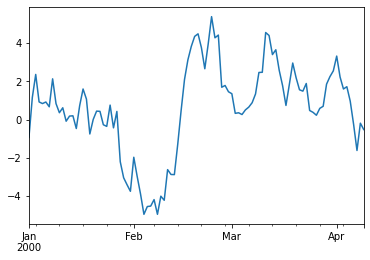

In [2]:
ts = pd.Series(np.random.randn(100), index=pd.date_range('1/1/2000', periods=100))
ts = ts.cumsum()
ts.plot()

<Figure size 432x288 with 0 Axes>

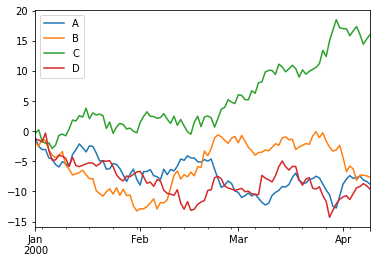

In [3]:
df = pd.DataFrame(np.random.randn(100, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
plt.figure()
df.plot()

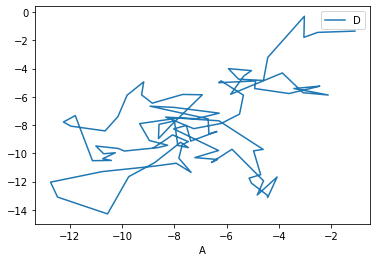

In [4]:
df.plot(x='A', y='D')

# 2. Bar Plots 

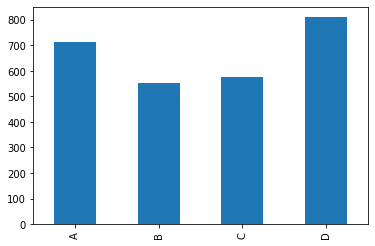

In [5]:
df.abs().sum().plot.bar()

## Multiple bar plot (default)

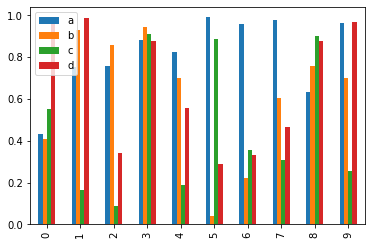

In [6]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

df2.plot.bar()

## Stacked bar plots

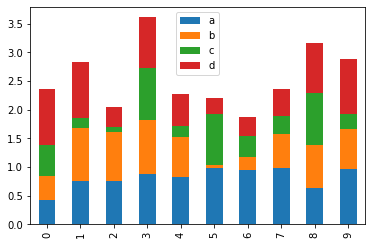

In [7]:
df2.plot.bar(stacked=True)

## Horizontal bar plots

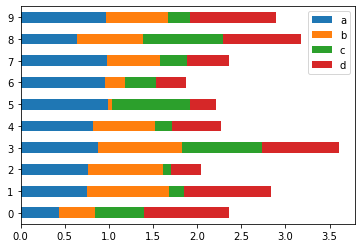

In [8]:
df2.plot.barh(stacked=True)

# 3. Histograms

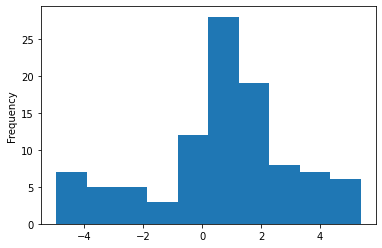

In [9]:
ts.plot.hist()

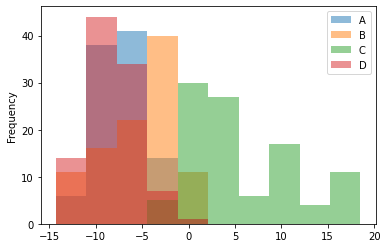

In [10]:
df.plot.hist(alpha=0.5)

## Stacked histograms

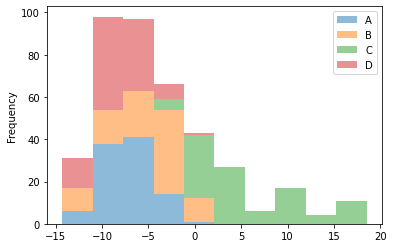

In [11]:
df.plot.hist(stacked=True, alpha=0.5)

## Cumulative histograms

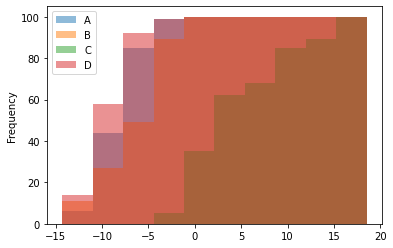

In [12]:
df.plot.hist(cumulative=True, alpha=0.5)

## Horizontal histograms

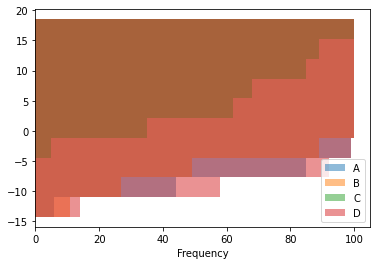

In [13]:
df.plot.hist(cumulative=True, orientation='horizontal', alpha=0.5)

## Multiple histogram subplots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8f6ed74a8>,
      dtype=object)

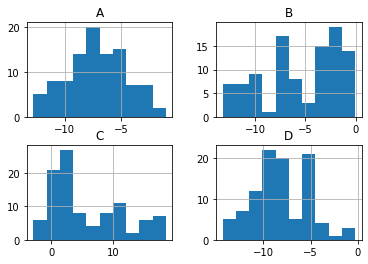

In [14]:
df.hist()

# 4. Box  plots

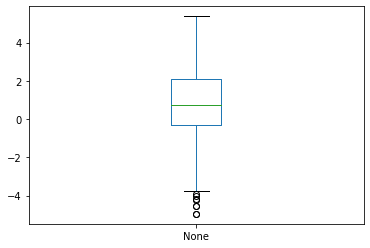

In [15]:
ts.plot.box()

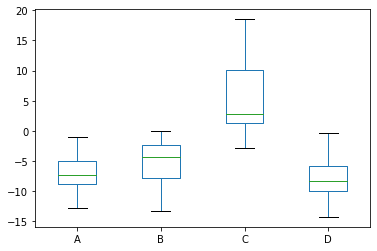

In [16]:
df.plot.box()

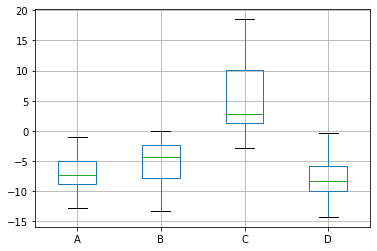

In [17]:
df.boxplot()

## Horizontal boxplots

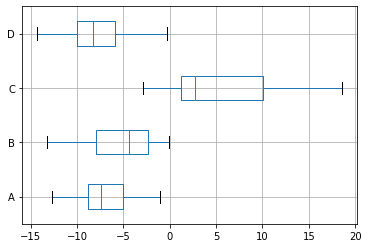

In [18]:
df.boxplot(vert=False)

# 5. Area plots

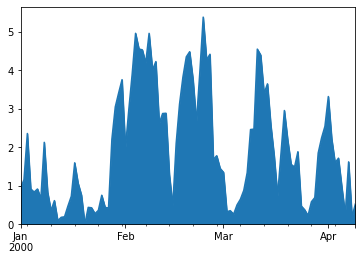

In [19]:
ts.abs().plot.area() # absolute values are used since for stacked area plots all values must be either +ve or -ve

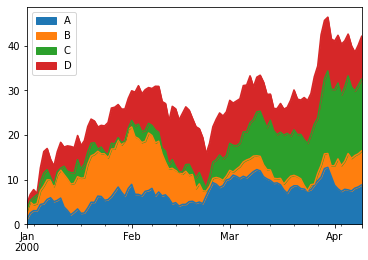

In [20]:
df.abs().plot.area()

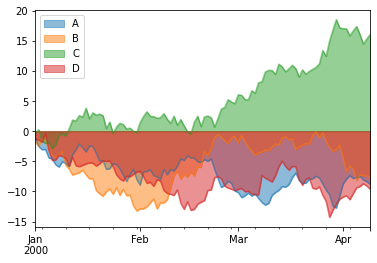

In [21]:
df.plot.area(stacked=False)

# 6. Scatter plots

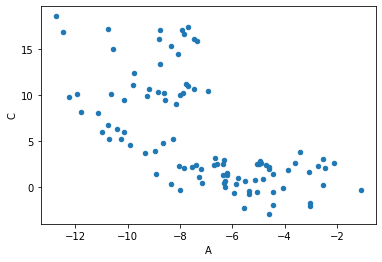

In [22]:
df.plot.scatter(x='A', y='C')

## Multiple column groups in same axes

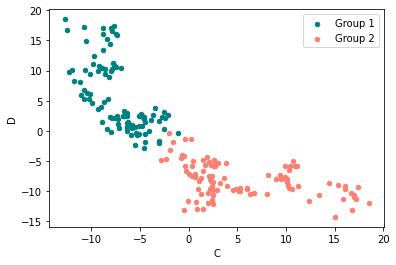

In [23]:
ax = df.plot.scatter(x='A', y='C', color='teal', label='Group 1');

df.plot.scatter(x='C', y='D', color='salmon', label='Group 2', ax=ax);

## Color scaling the points using a column

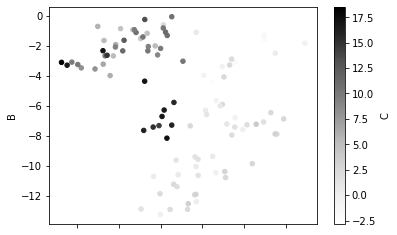

In [24]:
df.plot.scatter(x='A', y='B', c='C')

## Setting bubble size

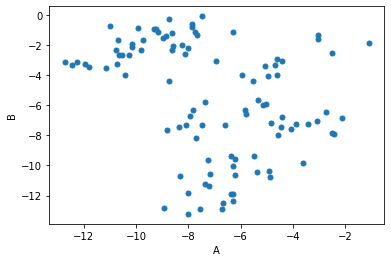

In [25]:
df.plot.scatter(x='A', y='B', s=25)

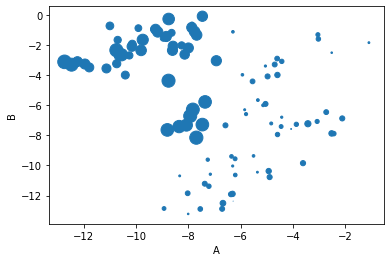

In [26]:
# using column C
df.plot.scatter(x='A', y='B', s=df['C'].abs()*10)

# 7. Hexagonal bin plots

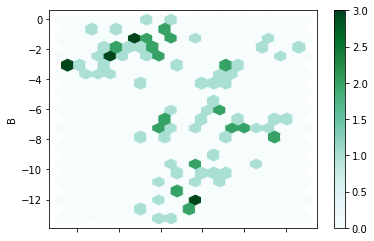

In [27]:
df.plot.hexbin(x='A', y='B', gridsize=20)

## Specifying alternate aggregating functions

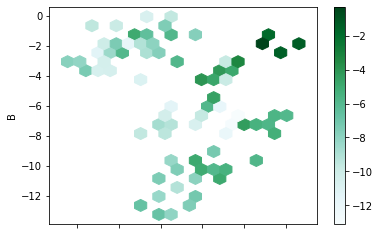

In [28]:
df.plot.hexbin(x='A', y='B', C='D', reduce_C_function=np.max, gridsize=20) # others include min, sum, mean, ...

# 8. Pie plots

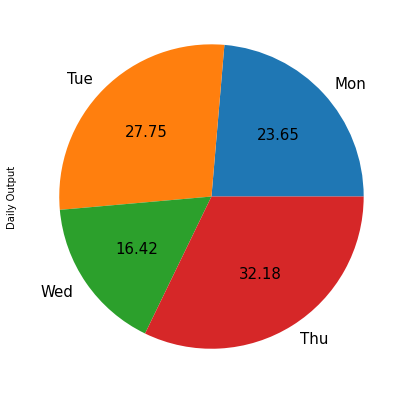

In [29]:
series = pd.Series([144, 169, 100, 196], index=['Mon', 'Tue', 'Wed', 'Thu'], name='Daily Output')

series.plot.pie(figsize=(7, 7), autopct='%.2f', fontsize=15)

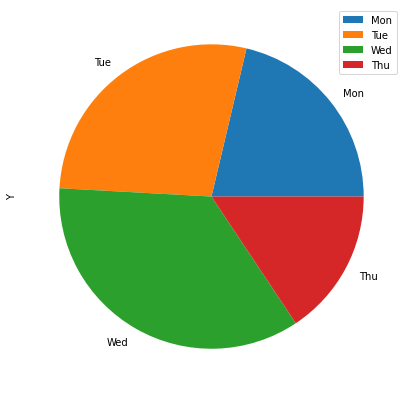

In [30]:
df2 = pd.DataFrame({ 'X':[144, 169, 100, 196], 'Y':[49, 64, 81, 36]}, index=['Mon', 'Tue', 'Wed', 'Thu'])

df2.plot.pie(y='Y', figsize=(7,7))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8f6348ba8>,
      dtype=object)

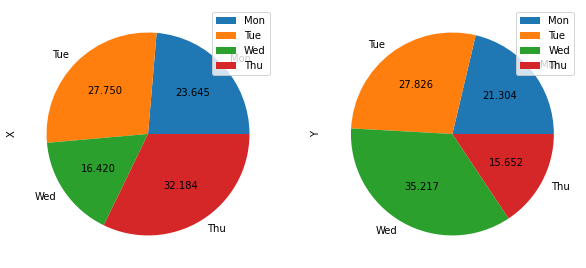

In [31]:
df2.plot.pie(subplots=True, figsize=(10,5), autopct='%.3f')

> **Note:** If you pass values whose sum total is less than 1.0, matplotlib draws an incomplete circle.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8f62903c8>,
      dtype=object)

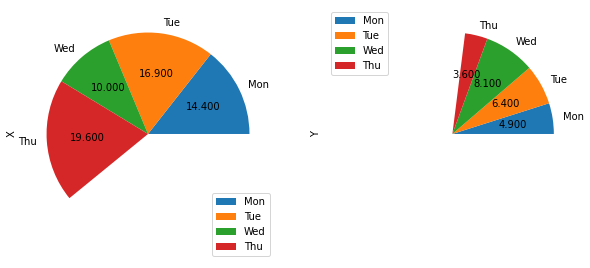

In [32]:
(df2/1000).plot.pie(subplots=True, figsize=(10,5), autopct='%.3f')

# 9. Handling Missing Data
Missing values are dropped, left out, or filled depending on the plot type.

In [33]:
pd.read_html('https://pandas.pydata.org/docs/user_guide/visualization.html')[1]

,Plot Type,NaN Handling
0,Line,Leave gaps at NaNs
1,Line (stacked),Fill 0’s
2,Bar,Fill 0’s
3,Scatter,Drop NaNs
4,Histogram,Drop NaNs (column-wise)
5,Box,Drop NaNs (column-wise)
6,Area,Fill 0’s
7,KDE,Drop NaNs (column-wise)
8,Hexbin,Drop NaNs
9,Pie,Fill 0’s


# 10. Plotting Tools
These functions can be imported from pandas.plotting and take a `Series` or `DataFrame` as an argument.

## 10.1 Scatter Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8f4cf0550>,
      dtype=object)

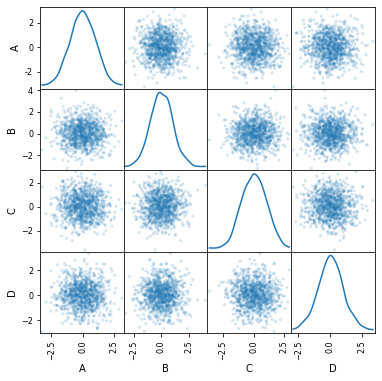

In [34]:
from pandas.plotting import scatter_matrix

df = pd.DataFrame(np.random.randn(1000, 4), columns=['A', 'B', 'C', 'D'])

scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8eb0966a0>,
      dtype=object)

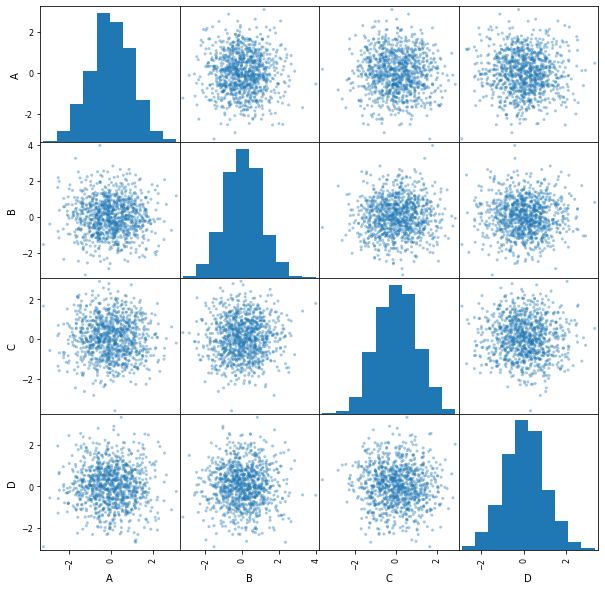

In [35]:
scatter_matrix(df, alpha=0.4, figsize=(10,10), diagonal='hist')

## 10.2 Density Plot

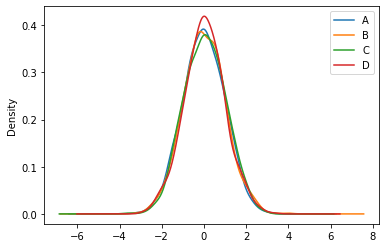

In [36]:
df.plot.kde()

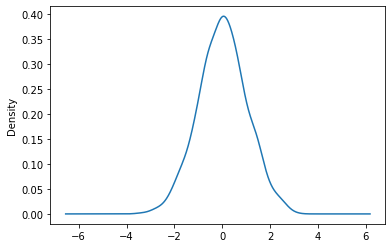

In [37]:
s = pd.Series(np.random.randn(1000))

s.plot.kde()

## 10.3 Andrew Curves

In [38]:
from pandas.plotting import andrews_curves

# fetching iris data
columns=['sepal length in cm', 'sepal width in cm', 'petal length in cm',
         'petal width in cm', 'class']
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
       header=None, names=columns)
data

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


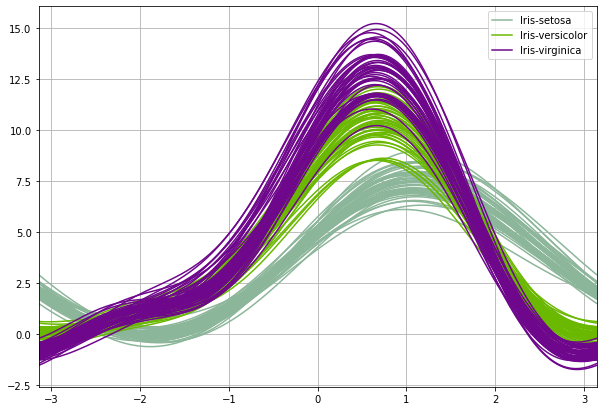

In [39]:
plt.figure(figsize=(10,7))
andrews_curves(data, 'class')

## 10.4 Parallel Coordinates

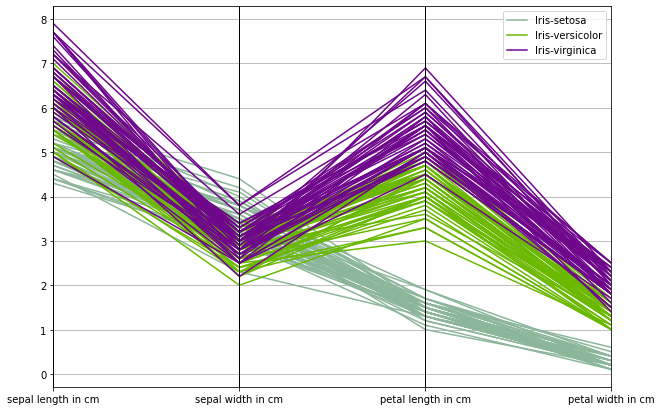

In [40]:
from pandas.plotting import parallel_coordinates

# using the iris data
plt.figure(figsize=(10,7))
parallel_coordinates(data, 'class')

## 10.5 Lag Plot
Lag plots are used to check if a data set or time series is random. Random data should not exhibit any structure in the lag plot.

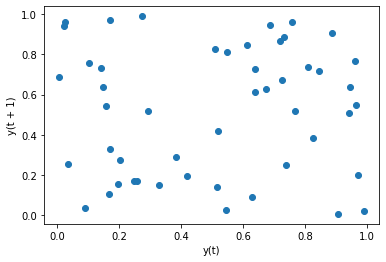

In [41]:
from pandas.plotting import lag_plot

s = pd.Series(np.random.rand(50))
lag_plot(s)

## 10.6 Autocorrelation Plots

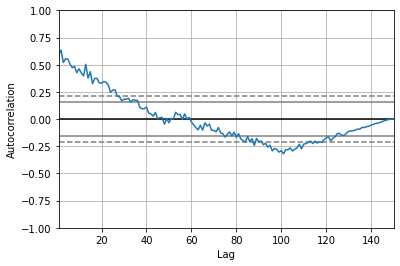

In [42]:
from pandas.plotting import autocorrelation_plot

# using the iris data
s = pd.Series(data['sepal length in cm'])
autocorrelation_plot(s)

## 10.7 Bootstrap Plot

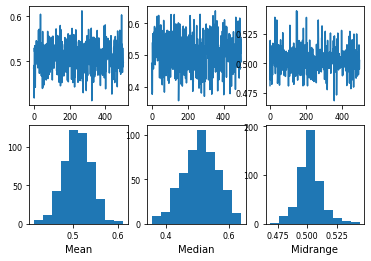

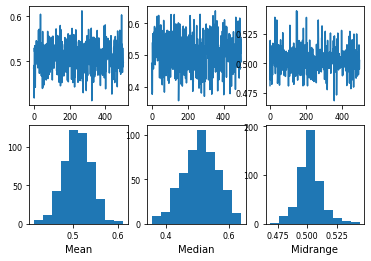

In [43]:
from pandas.plotting import bootstrap_plot

s = pd.Series(np.random.rand(1000))
bootstrap_plot(s, size=70)

## 10.8 RadViz

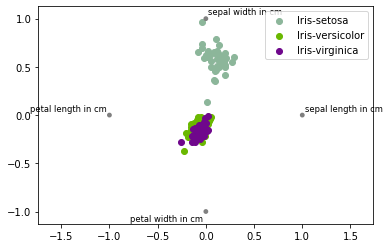

In [44]:
from pandas.plotting import radviz

# using the iris data
radviz(data, 'class')

# 11. Plot Formatting

## 11.1 Setting Plot Style

In [45]:
import matplotlib
matplotlib.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

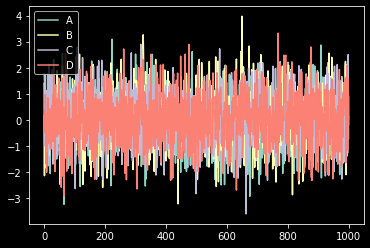

In [46]:
matplotlib.style.use('dark_background')
df.plot()

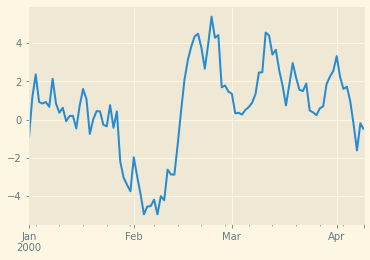

In [47]:
matplotlib.style.use('Solarize_Light2')
ts.plot()

## 11.2 General Plot Style Arguments

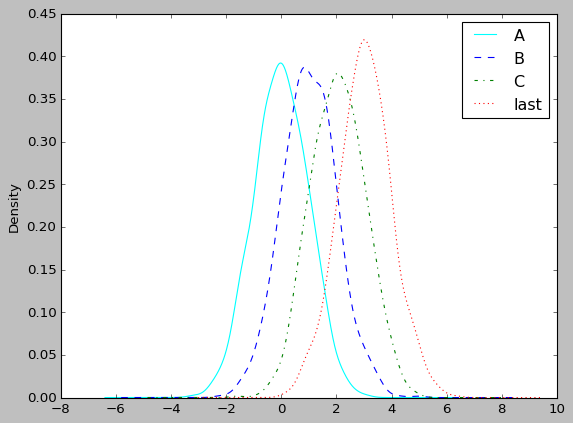

In [48]:
matplotlib.style.use('classic')
df.A.plot(style='-', kind='kde', color='cyan')  # solid line
(df.B +1).plot(style='--', kind='kde')  # dashed line
(df.C +2).plot(style='-.', kind='kde')  # dash-dotted line
(df.D +3).plot(style=':', kind='kde', label='last')  # dotted line
plt.legend()

## 11.3 Scales

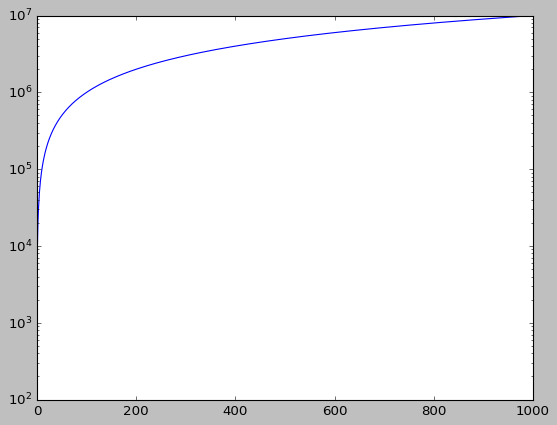

In [49]:
# to get a log scale y-axis
s=pd.Series(range(100, 10**7,10**4))
s.plot(logy=True)

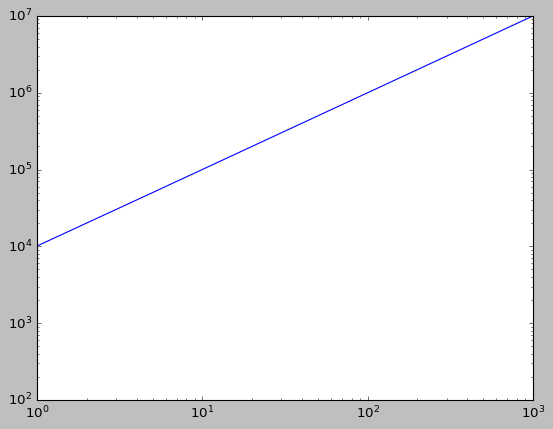

In [50]:
# log scale on both axes
s.plot(logy=True, logx=True)

## 11.4 Subplots

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8e8475a20>,
      dtype=object)

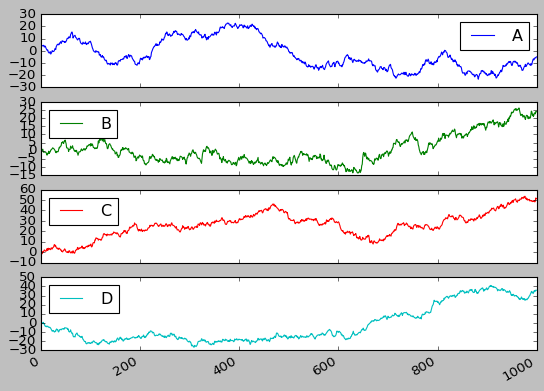

In [51]:
df=df.cumsum()
df.plot(subplots=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8e832b588>,
      dtype=object)

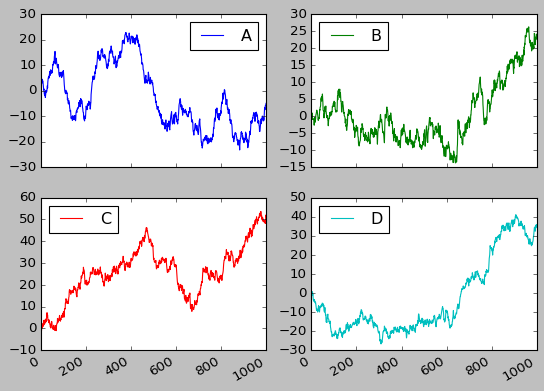

In [52]:
df.plot(subplots=True, layout=(2, 2))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8e8370080>,
      dtype=object)

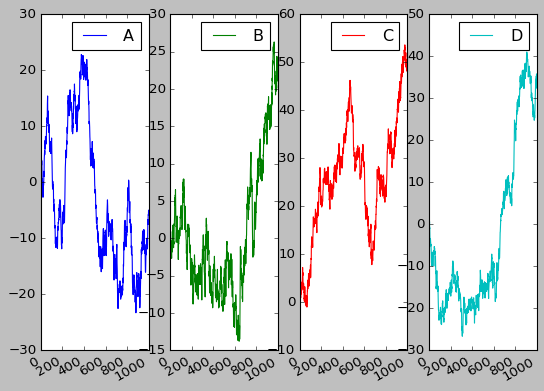

In [53]:
df.plot(subplots=True, layout=(1,4))

## 11.5 Plotting Tables

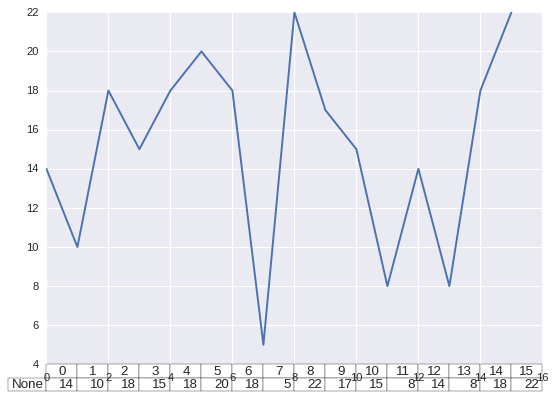

In [54]:
matplotlib.style.use('seaborn')
s = pd.Series([14,10,18,15,18,20,18,5,22,17,15,8,14,8,18,22])
s.plot(table=True)

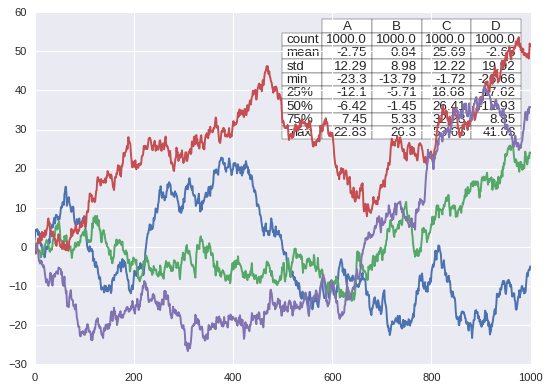

In [55]:
from pandas.plotting import table

# adding a table to axes
fig, ax = plt.subplots(1, 1)

table(ax, np.round(df.describe(), 2),
          loc='upper right', colWidths=[0.1, 0.1, 0.1, 0.1])
df.plot(ax=ax, legend=None)

## 11.6 Color Maps

In [56]:
# Matplotlib color maps
cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Cyclic', ['twilight', 'twilight_shifted', 'hsv']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])]

labels=[cmaps[i][0] for i in range(len(cmaps))]
cols=[cmaps[i][1] for i in range(len(cmaps))]
dfc=pd.DataFrame(cols).T
dfc.columns=labels
dfc

,Perceptually Uniform Sequential,Sequential,Sequential (2),Diverging,Cyclic,Qualitative,Miscellaneous
0,viridis,Greys,binary,PiYG,twilight,Pastel1,flag
1,plasma,Purples,gist_yarg,PRGn,twilight_shifted,Pastel2,prism
2,inferno,Blues,gist_gray,BrBG,hsv,Paired,ocean
3,magma,Greens,gray,PuOr,None,Accent,gist_earth
4,cividis,Oranges,bone,RdGy,None,Dark2,terrain
5,None,Reds,pink,RdBu,None,Set1,gist_stern
6,None,YlOrBr,spring,RdYlBu,None,Set2,gnuplot
7,None,YlOrRd,summer,RdYlGn,None,Set3,gnuplot2
8,None,OrRd,autumn,Spectral,None,tab10,CMRmap
9,None,PuRd,winter,coolwarm,None,tab20,cubehelix


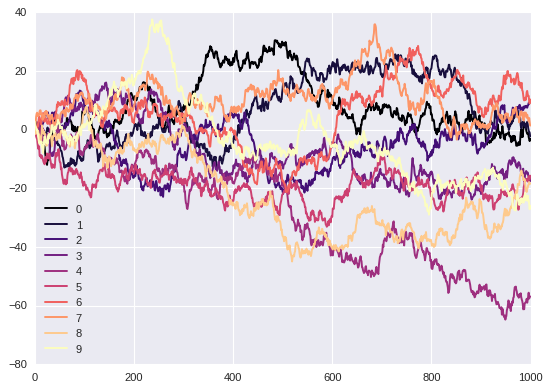

In [57]:
df = pd.DataFrame(np.random.randn(1000, 10)).cumsum()
df.plot(colormap='magma')

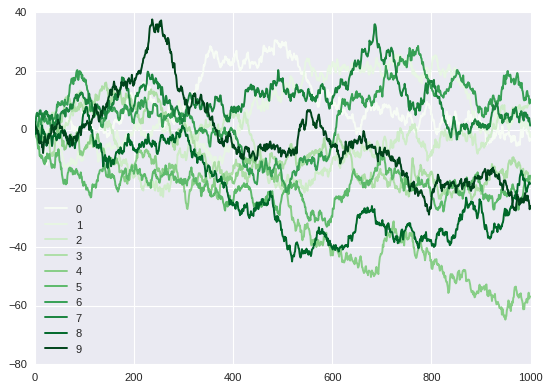

In [58]:
df.plot(colormap='Greens')

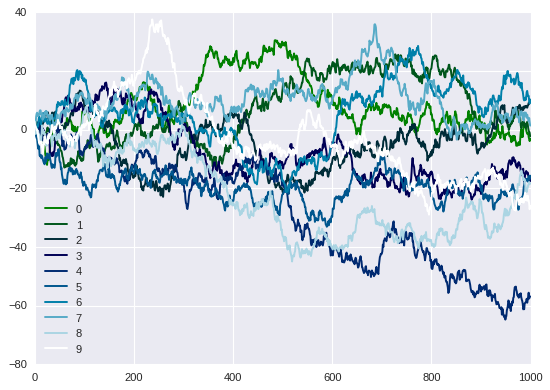

In [59]:
df.plot(colormap='ocean')

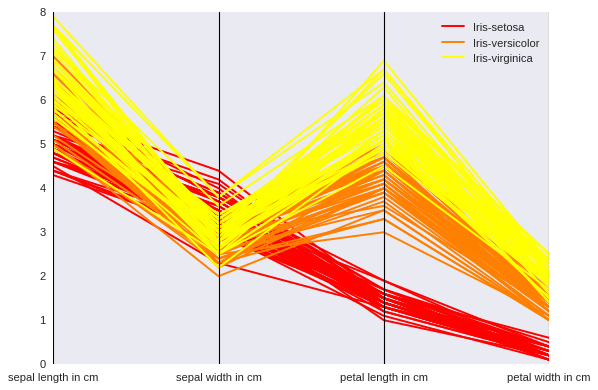

In [60]:
parallel_coordinates(data, 'class', colormap='autumn')

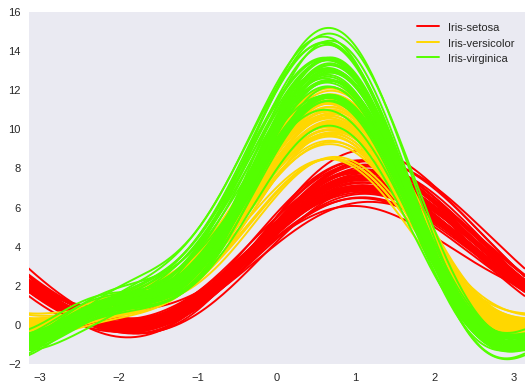

In [61]:
andrews_curves(data, 'class', colormap='prism')